In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split

from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Creating a DataFrame
df = pd.read_excel('PCusecase.xlsx')
df.head()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X32,X33,X34,X35,X36,X37,X38,X39,Y,Unnamed: 40
0,Enterprise_Hardware,FG Purchased Parts,Aftermarket,Adv Data Capture,Engines,1D ENGINE-ACC,1D ENGINE-ACC,90004,1D ENGINE-ACC,Y,...,1.0,Sellable Standard,Y,Y,Compliant,No,0.001,0.0,Accessories,NaN
1,Enterprise_Hardware,FG Purchased Parts,Aftermarket,Adv Data Capture,Engines,1D ENGINE-ACC,1D ENGINE-ACC,90004,1D ENGINE-ACC,Y,...,1.0,Sellable Custom,Blank,Y,Missing Info,No,0.041,30.0,Accessories,NaN
2,Enterprise_Hardware,FG Purchased Parts,Aftermarket,Adv Data Capture,Engines,1D ENGINE-ACC,SE9XX-ACC,90008,SE9XX-ACC,Y,...,1.0,Sellable Standard,Y,Y,Compliant,No,0.001,0.0,Accessories,NaN
3,Enterprise_Hardware,FG Purchased Parts,Aftermarket,Adv Data Capture,Engines,1D ENGINE-ACC,SE9XX-ACC,90008,SE9XX-ACC,Y,...,1.0,Sellable Standard,Y,Y,Compliant,No,0.01,0.0,Accessories,NaN
4,Enterprise_Hardware,FG Purchased Parts,Aftermarket,Adv Data Capture,Engines,1D ENGINE-ACC,SE9XX-ACC,90008,SE9XX-ACC,Y,...,1.0,Sellable Custom,Blank,Y,Exempt,No,0.354,66.0,Accessories,NaN


# EDA

In [3]:
# get the shape of the dataframe
num_rows, num_cols = df.shape

# print the number of columns
print(f"The dataframe has {num_cols} columns.")

The dataframe has 41 columns.


In [4]:
df.dtypes

X1              object
X2              object
X3              object
X4              object
X5              object
X6              object
X7              object
X8              object
X9              object
X10             object
X11             object
X12             object
X13             object
X14             object
X15             object
X16             object
X17             object
X18             object
X19             object
X20             object
X21             object
X22             object
X23             object
X24             object
X25             object
X26             object
X27             object
X28             object
X29             object
X30             object
X31             object
X32            float64
X33             object
X34             object
X35             object
X36             object
X37             object
X38             object
X39            float64
Y               object
Unnamed: 40    float64
dtype: object

In [5]:
df.X23

0        2016-03-11 00:00:00
1        2016-03-11 00:00:00
2        2016-03-10 00:00:00
3        2016-03-11 00:00:00
4        2016-03-10 00:00:00
                ...         
27181    2019-03-17 00:00:00
27182    2019-03-20 00:00:00
27183    2019-03-20 00:00:00
27184    2019-01-08 00:00:00
27185    2019-03-17 00:00:00
Name: X23, Length: 27186, dtype: object

In [6]:
df.X24

0                          0
1                       0.09
2                          0
3                       0.02
4                       0.78
                ...         
27181                   0.07
27182    2023-01-01 00:00:00
27183                      0
27184                   0.11
27185                      0
Name: X24, Length: 27186, dtype: object

# There is an issue with the columns types
mix of floats and strings in single columns.

In [7]:
# count dates and numbers in multiple columns
def count_dates_numbers(df, columns):
    counts = {}
    for col in columns:
        total_rows = len(df[col])
        num_dates = sum(pd.to_datetime(df[col], errors='coerce').notnull())
        num_numbers = total_rows - num_dates
        pct_dates = num_dates / total_rows * 100
        pct_numbers = num_numbers / total_rows * 100
        counts[col] = {'total_rows': total_rows, 'num_dates': num_dates, 'pct_dates': pct_dates, 'num_numbers': num_numbers, 'pct_numbers': pct_numbers}
    return counts

# define a list of columns to count dates and numbers
columns_to_count = ['X23','X24', 'X25', 'X26', 'X27', 'X31', 'X32', 'X38', 'X39']

# call the count_dates_numbers function and print the results
counts = count_dates_numbers(df, columns_to_count)
#
for col in counts:
    print(col)
    print("Total rows: ", counts[col]['total_rows'])
    print("Number of rows with dates: ", counts[col]['num_dates'], " ({:.0f}%)".format(counts[col]['pct_dates']))
    print("Number of rows with numbers: ", counts[col]['num_numbers'], " ({:.0f}%)".format(counts[col]['pct_numbers']))


X23
Total rows:  27186
Number of rows with dates:  27098  (100%)
Number of rows with numbers:  88  (0%)
X24
Total rows:  27186
Number of rows with dates:  13166  (48%)
Number of rows with numbers:  14020  (52%)
X25
Total rows:  27186
Number of rows with dates:  11912  (44%)
Number of rows with numbers:  15274  (56%)
X26
Total rows:  27186
Number of rows with dates:  20182  (74%)
Number of rows with numbers:  7004  (26%)
X27
Total rows:  27186
Number of rows with dates:  20144  (74%)
Number of rows with numbers:  7042  (26%)
X31
Total rows:  27186
Number of rows with dates:  27140  (100%)
Number of rows with numbers:  46  (0%)
X32
Total rows:  27186
Number of rows with dates:  27143  (100%)
Number of rows with numbers:  43  (0%)
X38
Total rows:  27186
Number of rows with dates:  11254  (41%)
Number of rows with numbers:  15932  (59%)
X39
Total rows:  27186
Number of rows with dates:  27101  (100%)
Number of rows with numbers:  85  (0%)


In [8]:
# define a function to replace star with 0
def replace_star(x):
    if isinstance(x, str) and '*' in x:
        return x.replace('*', '0')
    else:
        return x

# apply the function to the entire DataFrame using applymap()
df = df.applymap(replace_star)

# print the updated DataFrame
print(df)


                        X1                  X2           X3   
0      Enterprise_Hardware  FG Purchased Parts  Aftermarket  \
1      Enterprise_Hardware  FG Purchased Parts  Aftermarket   
2      Enterprise_Hardware  FG Purchased Parts  Aftermarket   
3      Enterprise_Hardware  FG Purchased Parts  Aftermarket   
4      Enterprise_Hardware  FG Purchased Parts  Aftermarket   
...                    ...                 ...          ...   
27181  Enterprise_Services  FG Purchased Parts  Aftermarket   
27182  Enterprise_Services  FG Purchased Parts  Aftermarket   
27183  Enterprise_Services  FG Purchased Parts  Aftermarket   
27184  Enterprise_Services  FG Purchased Parts  Aftermarket   
27185  Enterprise_Services  FG Purchased Parts  Aftermarket   

                          X4               X5                  X6   
0           Adv Data Capture          Engines       1D ENGINE-ACC  \
1           Adv Data Capture          Engines       1D ENGINE-ACC   
2           Adv Data Capture        

In [9]:
df_copy = df.copy()

In [10]:
# X8
df_copy['X8'] = df_copy['X8'].replace('Exempt', 0)
df_copy['X8'] = df_copy['X8'].replace('Compliant', 0)
df_copy['X8'] = df_copy['X8'].astype(float)
#


In [11]:
df_copy['X23'] = df_copy['X23'].replace('No', 0)
df_copy['X23'] = pd.to_datetime(df_copy['X23'], errors='coerce')


In [12]:
df_copy['X24'] = pd.to_numeric(df_copy['X24'], errors='coerce').fillna(0)


In [13]:
df_copy['X25'] = pd.to_numeric(df_copy['X25'], errors='coerce').fillna(0)


In [14]:
# convert column to datetime and replace non-date values with NaT
df_copy['X26'] = pd.to_datetime(df_copy['X26'], errors='coerce')

# replace NaT values with 0
df_copy['X26'] = df_copy['X26'].fillna(0)


In [15]:
# convert column to datetime and replace non-date values with NaT
df_copy['X27'] = pd.to_datetime(df_copy['X27'], errors='coerce')

# replace NaT values with 0
df_copy['X27'] = df_copy['X27'].fillna(0)

In [16]:
df_copy.dtypes

X1                     object
X2                     object
X3                     object
X4                     object
X5                     object
X6                     object
X7                     object
X8                    float64
X9                     object
X10                    object
X11                    object
X12                    object
X13                    object
X14                    object
X15                    object
X16                    object
X17                    object
X18                    object
X19                    object
X20                    object
X21                    object
X22                    object
X23            datetime64[ns]
X24                   float64
X25                   float64
X26                    object
X27                    object
X28                    object
X29                    object
X30                    object
X31                    object
X32                   float64
X33                    object
X34       

In [17]:
cat_cols = df_copy.select_dtypes(include='object').columns
num_cat_cols = len(cat_cols)
print("There are", num_cat_cols, "categorical columns in the dataset.")


There are 34 categorical columns in the dataset.


In [18]:
print(cat_cols)

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X9', 'X10', 'X11', 'X12',
       'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22',
       'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X33', 'X34', 'X35', 'X36',
       'X37', 'X38', 'Y'],
      dtype='object')


In [19]:
# replace numeric values with "unknown" in multiple columns
cols_to_replace = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X9', 'X10', 'X11', 'X12',
       'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22',
       'X26', 'X27', 'X28', 'X29', 'X30', 'X33', 'X34', 'X35', 'X36', 'X37',
       'Y']
df_copy[cols_to_replace] = df_copy[cols_to_replace].replace(to_replace=[1, 2, 3, 4], value="unknown")

# print the updated dataframe
df_copy

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X32,X33,X34,X35,X36,X37,X38,X39,Y,Unnamed: 40
0,Enterprise_Hardware,FG Purchased Parts,Aftermarket,Adv Data Capture,Engines,1D ENGINE-ACC,1D ENGINE-ACC,90004.0,1D ENGINE-ACC,Y,...,1.0,Sellable Standard,Y,Y,Compliant,No,0.001,0.0,Accessories,NaN
1,Enterprise_Hardware,FG Purchased Parts,Aftermarket,Adv Data Capture,Engines,1D ENGINE-ACC,1D ENGINE-ACC,90004.0,1D ENGINE-ACC,Y,...,1.0,Sellable Custom,Blank,Y,Missing Info,No,0.041,30.0,Accessories,NaN
2,Enterprise_Hardware,FG Purchased Parts,Aftermarket,Adv Data Capture,Engines,1D ENGINE-ACC,SE9XX-ACC,90008.0,SE9XX-ACC,Y,...,1.0,Sellable Standard,Y,Y,Compliant,No,0.001,0.0,Accessories,NaN
3,Enterprise_Hardware,FG Purchased Parts,Aftermarket,Adv Data Capture,Engines,1D ENGINE-ACC,SE9XX-ACC,90008.0,SE9XX-ACC,Y,...,1.0,Sellable Standard,Y,Y,Compliant,No,0.01,0.0,Accessories,NaN
4,Enterprise_Hardware,FG Purchased Parts,Aftermarket,Adv Data Capture,Engines,1D ENGINE-ACC,SE9XX-ACC,90008.0,SE9XX-ACC,Y,...,1.0,Sellable Custom,Blank,Y,Exempt,No,0.354,66.0,Accessories,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27181,Enterprise_Services,FG Purchased Parts,Aftermarket,Svcs Other Enterprise,Xplore Services,Xplore Spare Parts,Xplore Spare Parts,92811.0,Xplore Spare Parts,Y,...,1.0,Sellable Custom,Y,Y,Compliant,No,0.03,2.0,Services,NaN
27182,Enterprise_Services,FG Purchased Parts,Aftermarket,Svcs Other Enterprise,Xplore Services,Xplore Spare Parts,Xplore Spare Parts,92811.0,Xplore Spare Parts,Y,...,1.0,Sellable Custom,Y,Y,Exempt,No,0.499,51.0,Services,NaN
27183,Enterprise_Services,FG Purchased Parts,Aftermarket,Svcs Other Enterprise,Xplore Services,Xplore Spare Parts,Xplore Spare Parts,92811.0,Xplore Spare Parts,Y,...,1.0,Sellable Custom,Y,Y,Exempt,No,0.001,0.0,Services,NaN
27184,Enterprise_Services,FG Purchased Parts,Aftermarket,Svcs Other Enterprise,Xplore Services,Xplore Spare Parts,Xplore Spare Parts,92811.0,Xplore Spare Parts,Y,...,1.0,Sellable Custom,Y,Y,Exempt,No,0.05,4.0,Services,NaN


In [20]:
def calculate_nan_percentage(df):
    """
    Calculate the percentage of NaN values in each column of a dataframe.
    """
    percentage_nan = df.isna().mean() * 100
    percentage_nan = percentage_nan.sort_values(ascending=False)
    return percentage_nan

In [21]:
# calculate the percentage of NaN values in each column
percentage_nan = calculate_nan_percentage(df_copy)

# print the result
print(percentage_nan)


Unnamed: 40    99.988965
X21            10.829103
Y               0.312661
X39             0.312661
X38             0.312661
X37             0.312661
X36             0.312661
X23             0.169205
X22             0.158170
X16             0.158170
X29             0.158170
X20             0.158170
X19             0.158170
X18             0.158170
X17             0.158170
X32             0.158170
X30             0.158170
X31             0.158170
X33             0.158170
X34             0.158170
X35             0.158170
X28             0.158170
X3              0.003678
X12             0.003678
X11             0.003678
X5              0.003678
X6              0.003678
X7              0.003678
X8              0.003678
X9              0.003678
X10             0.003678
X1              0.003678
X13             0.003678
X14             0.003678
X15             0.003678
X2              0.003678
X4              0.003678
X25             0.000000
X27             0.000000
X26             0.000000


In [22]:
df_copy = df_copy.drop(['Unnamed: 40', 'X8', 'X23', 'X24', 'X25', 'X26', 'X27'], axis=1)

In [23]:
# drop rows where all values are NaN
df_copy = df_copy.dropna(how='all')

In [24]:
df_copy.head()

,X1,X2,X3,X4,X5,X6,X7,X9,X10,X11,...,X31,X32,X33,X34,X35,X36,X37,X38,X39,Y
0,Enterprise_Hardware,FG Purchased Parts,Aftermarket,Adv Data Capture,Engines,1D ENGINE-ACC,1D ENGINE-ACC,1D ENGINE-ACC,Y,Y,...,110,1.0,Sellable Standard,Y,Y,Compliant,No,0.001,0.0,Accessories
1,Enterprise_Hardware,FG Purchased Parts,Aftermarket,Adv Data Capture,Engines,1D ENGINE-ACC,1D ENGINE-ACC,1D ENGINE-ACC,Y,Y,...,110,1.0,Sellable Custom,Blank,Y,Missing Info,No,0.041,30.0,Accessories
2,Enterprise_Hardware,FG Purchased Parts,Aftermarket,Adv Data Capture,Engines,1D ENGINE-ACC,SE9XX-ACC,SE9XX-ACC,Y,Y,...,110,1.0,Sellable Standard,Y,Y,Compliant,No,0.001,0.0,Accessories
3,Enterprise_Hardware,FG Purchased Parts,Aftermarket,Adv Data Capture,Engines,1D ENGINE-ACC,SE9XX-ACC,SE9XX-ACC,Y,Y,...,110,1.0,Sellable Standard,Y,Y,Compliant,No,0.01,0.0,Accessories
4,Enterprise_Hardware,FG Purchased Parts,Aftermarket,Adv Data Capture,Engines,1D ENGINE-ACC,SE9XX-ACC,SE9XX-ACC,Y,Y,...,110,1.0,Sellable Custom,Blank,Y,Exempt,No,0.354,66.0,Accessories


In [25]:
df_copy['Y'].unique()

array(['Accessories', 'Hardware', 'Software', nan, 'Solutions', 'Sunset',
       'Services', 'Parts', 132, 102], dtype=object)

In [26]:
# filter rows where Y is not blank
df_y_not_blank = df_copy[df_copy['Y'].notnull()]

# filter rows where Y is blank
df_y_blank = df_copy[df_copy['Y'].isnull() | (df_copy['Y'] == '')]

In [27]:
df_y_not_blank.shape

(27101, 34)

In [28]:
def plot_customer_counts_by_industry(df):
    # Get the count of customers in each industry
    industry_counts = df['Y'].value_counts()

    # Create a bar chart of the industry counts
    industry_counts.plot(kind='bar')

    # Set the chart title and axis labels
    plt.title('Number of Customers per product')
    plt.xlabel('Product')
    plt.ylabel('Number of Customers')

    # Display the chart
    plt.show()

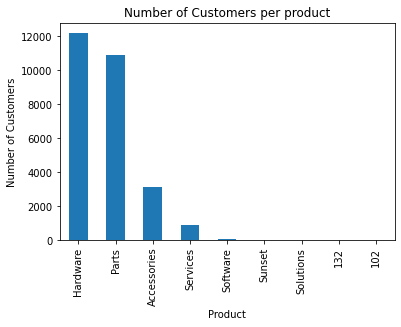

In [29]:
plot_customer_counts_by_industry(df_y_not_blank)

Hardwares category has the highest appearance in this dataset

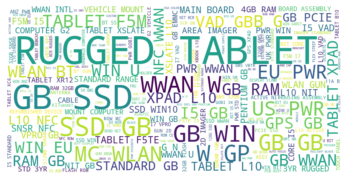

In [30]:
locations = ' '.join(df_y_not_blank['X15'].dropna())

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(locations)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [31]:
# Data per country level
df_y_not_blank.X21.value_counts()

X21
CN                   11051
TW                    7130
MX                    2221
XX                    1557
US                    1138
CA                     256
DE                     252
MY                     119
VN                     118
JP                      83
GB                      69
FR                      37
SG                      35
SE                      21
PH                      21
IL                      13
LK                      11
KR                      10
TH                       9
HK                       8
NZ                       6
IN                       5
PL                       5
SK                       4
IT                       4
FI                       3
AT                       3
JDM/ODM Component        3
CZ                       2
AU                       1
ZA                       1
SV                       1
ID                       1
HU                       1
CH                       1
Name: count, dtype: int64

In [32]:
df_y_not_blank.X22.value_counts()

X22
Exempt            14773
Compliant          7862
Missing Info       4320
Non-Compliant        99
Not Applicable       43
TW                    3
Waived                1
Name: count, dtype: int64

In [35]:
from scipy.stats import chi2_contingency

# calculate the Cramér's V correlation matrix
def cramers_v(x, y):
    x = x.astype('category')
    y = y.astype('category')
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

corr_matrix = pd.DataFrame(columns=df_country.columns, index=df_country.columns)
for i in range(len(df_country.columns)):
    for j in range(len(df_country.columns)):
        if i == j:
            corr_matrix.iloc[i, j] = 1.0
        else:
            x = df_country.iloc[:, i]
            y = df_country.iloc[:, j]
            corr_matrix.iloc[i, j] = cramers_v(x, y)

# display the correlation matrix
print(corr_matrix)

           X1   X2   X3        X4        X5        X6        X7        X9   
X1        1.0  NaN  NaN  0.998679  0.993819  0.973233  0.950815  0.950815  \
X2        NaN  1.0  NaN       NaN       NaN       NaN       NaN       NaN   
X3        NaN  NaN  1.0       NaN       NaN       NaN       NaN       NaN   
X4   0.998679  NaN  NaN       1.0  0.995134  0.974521  0.952073  0.952073   
X5   0.993819  NaN  NaN  0.995134       1.0  0.979286  0.956729  0.956729   
X6   0.973233  NaN  NaN  0.974521  0.979286       1.0  0.976965  0.976965   
X7   0.950815  NaN  NaN  0.952073  0.956729  0.976965       1.0       1.0   
X9   0.950815  NaN  NaN  0.952073  0.956729  0.976965       1.0       1.0   
X10       NaN  NaN  NaN       NaN       NaN       NaN       NaN       NaN   
X11       NaN  NaN  NaN       NaN       NaN       NaN       NaN       NaN   
X12       NaN  NaN  NaN       NaN       NaN       NaN       NaN       NaN   
X13  0.700359  NaN  NaN  0.576254  0.321389  0.283319  0.285908  0.285908   

# Define pipelines to preprocess the data and train multiple machine learning models.

# Country agregated level

In [36]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Split data into X and y
X = df_country.drop('Y', axis=1)
y = df_country['Y']

def find_datetime_columns(X):
    datetime_cols = []
    for col in df.columns:
        if df[col].dtype == 'datetime64[ns]':
            datetime_cols.append(col)
    return datetime_cols

def find_categorical_columns(X, threshold=0.05):
    categorical_cols = []
    for col in X.columns:
        if X[col].dtype == 'object':
            categorical_cols.append(col)
        else:
            unique_values_ratio = X[col].nunique() / len(X)
            if unique_values_ratio < threshold:
                categorical_cols.append(col)
    return categorical_cols

datetime_cols = find_datetime_columns(X)
categorical_cols = find_categorical_columns(X)
X = pd.get_dummies(X, columns=categorical_cols)
float_cols = X.select_dtypes(include=['float']).columns

if len(float_cols) > 0:
    # Handle missing values
    imputer = SimpleImputer(strategy='mean')
    X[float_cols] = imputer.fit_transform(X[float_cols])
    # Scale numerical features
    scaler = StandardScaler()
    X_float_scaled = scaler.fit_transform(X[float_cols])
    X[float_cols] = X_float_scaled

# convert y to string data type
y = y.astype(str)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25, random_state=42)

# define a list of possible models to be trained for this project
models = [
    {'name': 'Logistic Regression', 'model': LogisticRegression(max_iter=10)},
    {'name': 'Random Forest', 'model': RandomForestClassifier(n_estimators=100, random_state=42)},
    {'name': 'K-Nearest Neighbors', 'model': KNeighborsClassifier(n_neighbors=5)},
    {'name': 'Naive Bayes', 'model': GaussianNB()},
]

# train each model and store the results in a dictionary
results = {}
for model in models:
    pipeline = Pipeline([
        ('model', model['model'])
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model['name']] = {
        'model': pipeline,
        'accuracy': accuracy
    }

# print the results
for name, result in results.items():
    print('{} Accuracy: {:.2f}'.format(name, result['accuracy']))


Logistic Regression Accuracy: 0.99
Random Forest Accuracy: 0.99
K-Nearest Neighbors Accuracy: 0.98
Naive Bayes Accuracy: 0.99


In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score, f1_score, classification_report

# Define the hyperparameter grid
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}
# hypertune the model using GridSearchCV
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# print the best hyperparameters and the corresponding accuracy
print("Best hyperparameters:", grid_search.best_params_)
print("Training accuracy:", grid_search.best_score_)


Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training accuracy: 0.9847471620227038


In [38]:
# retrain the model on the full training set with the best hyperparameters
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# compute feature importance
importances = best_rf.feature_importances_
feature_importances = pd.Series(importances, index=X_train.columns)
#feature_importances.nlargest(10).plot(kind='barh')


In [39]:
# compute other metrics on the test set
y_pred = best_rf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       134
           1       1.00      0.62      0.77         8
           2       0.99      1.00      1.00       134
           3       1.00      1.00      1.00         8
           4       0.00      0.00      0.00         1

    accuracy                           0.99       285
   macro avg       0.79      0.72      0.75       285
weighted avg       0.98      0.99      0.98       285

[[134   0   0   0   0]
 [  2   5   1   0   0]
 [  0   0 134   0   0]
 [  0   0   0   8   0]
 [  1   0   0   0   0]]
